# Packmol Interface

Packmol is a tool for creating initial configurations for molecular dynamics simulations by packing molecules into a given region of space. molify provides a Python interface to Packmol, making it easy to build molecular systems. 

`molify` ships with a pre-compiled binary of packmol. For more about Packmol, see https://github.com/m3g/Packmol

In [1]:
from rdkit.Chem import Draw

import molify

## Basic Usage: Creating a Molecular Box

The `pack()` function creates periodic boxes filled with molecules at a specified density.

### Simple Example: Water Box

In [2]:
# Generate water conformers
water = molify.smiles2conformers("O", numConfs=10)

print(f"Generated {len(water)} water conformers")
print(f"Each conformer: {water[0]}")

Generated 10 water conformers
Each conformer: Atoms(symbols='OH2', pbc=False)


In [3]:
# Pack 10 water molecules into a box
water_box = molify.pack(
    data=[water],  # List of conformer lists
    counts=[10],  # Number of each molecule type
    density=1000,  # Density in kg/m³
)

print(f"Water box: {water_box}")
print(f"Cell dimensions: {water_box.cell.lengths()} Å")
print(f"Total atoms: {len(water_box)}")
print(f"Volume: {water_box.get_volume():.2f} Å³")

Water box: Atoms(symbols='OH2OH2OH2OH2OH2OH2OH2OH2OH2OH2', pbc=True, cell=[6.687972094719516, 6.687972094719516, 6.687972094719516])
Cell dimensions: [6.68797209 6.68797209 6.68797209] Å
Total atoms: 30
Volume: 299.15 Å³


The ``connectivity`` information from the input ``Atoms`` object is preserved in the output box.

In [4]:
# Connectivity is preserved!
print(f"Has connectivity: {'connectivity' in water_box.info}")
print(f"Number of bonds: {len(water_box.info['connectivity'])}")
print(f"Expected bonds: {10 * 2} (10 molecules x 2 O-H bonds each)")

Has connectivity: True
Number of bonds: 20
Expected bonds: 20 (10 molecules x 2 O-H bonds each)


## Parameters Explained

### `data`: List of Conformer Lists

`data` is a list where each element is a list of conformers (ASE Atoms objects) for one molecule type.

```python
data = [
    [water_conf1, water_conf2, ...],    # Water conformers
    [ethanol_conf1, ethanol_conf2, ...] # Ethanol conformers
]
```

### `counts`: Number of Each Molecule

```python
counts=[10, 5]  # 10 of first type, 5 of second type
```
If you need more molecules in the box than created conformers, they will be reused:
```python
water = molify.smiles2conformers("O", numConfs=5)
box = molify.pack(
    data=[water],
    counts=[10],  # Requesting 10 water molecules will use each conformer twice
    density=997 # kg/m^3
)
```

### `density`: Target Density (kg/m³)

The box size is automatically calculated to match this density.

## Creating Mixtures

### Water + Ethanol Mixture

In [5]:
# Generate conformers for both molecule types
water = molify.smiles2conformers("O", numConfs=10)
ethanol = molify.smiles2conformers("CCO", numConfs=10)

print(f"Water conformers: {len(water)}")
print(f"Ethanol conformers: {len(ethanol)}")

Water conformers: 10
Ethanol conformers: 10


In [6]:
# Create mixture: 5 water + 5 ethanol
mixture = molify.pack(
    data=[water, ethanol],
    counts=[5, 5],
    density=800,  # kg/m³
)

print(f"Mixture: {mixture}")
print(f"Cell: {mixture.cell.lengths()} Å")
print(f"Total atoms: {len(mixture)}")

Mixture: Atoms(symbols='OH2OH2OH2OH2OH2C2OH6C2OH6C2OH6C2OH6C2OH6', pbc=True, cell=[8.728901107040365, 8.728901107040365, 8.728901107040365])
Cell: [8.72890111 8.72890111 8.72890111] Å
Total atoms: 60


### Visualizing the Mixture

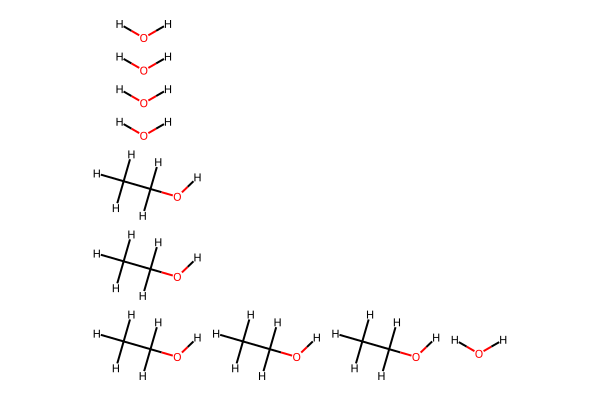

In [7]:
# Convert to RDKit for visualization
mixture_mol = molify.ase2rdkit(mixture)

# Visualize
Draw.MolToImage(mixture_mol, size=(600, 400))

## Working with Packed Systems

### Analyzing the Box

In [8]:
# Calculate actual density
from molify.utils import calculate_density

actual_density = calculate_density(mixture)
print(f"Density: {actual_density:.1f} kg/m³")

Density: 800.0 kg/m³


## Key Takeaways

### What We Learned

1. `pack()` creates periodic boxes of molecules at a target density.
   - Only changes atomic positions
   - Preserves all connectivity information
   - Preserves bond orders, charges, etc.

2. **Parameters**:
   - `data`: List of conformer lists (one per molecule type)
   - `counts`: How many of each molecule
   - `density`: Target density in kg/m³

3. **Conformers are reused** if counts > available conformers